# Testat Systematic Search

## Info
* All Questions answerd in the Document itself
* Code can be found on https://github.com/Inux/aiso

# Exercise Search Algorithms #


In the last session, we prepared different classes that are useful to solve search problems. You completed the Node class that we can use now for our first search strategy *breadth_first_tree_search*.

If you had problems implementing the node class, please come and see me. Without the Node class, you can't solve the following exercises.

First, you need to implement the breadth first search strategy:

Hints: 
- create the FIFO queue frontier using collections.py, that implements high performance data types. The collection.deque allows you to easily extend the queue with `frontier.append` and to remove items from the queue with `frontier.popleft()`
- remember that you can access the children of a node with the following code: `node.expand(problem)`
- return the goal node if you can find it


In [1]:
%matplotlib inline

from collections import deque
from search import *

def breadth_first_graph_search(problem):
    n = Node(problem.initial)
    
    if problem.goal_test(n.state):
        return n, 0, 0 #found the goal node
    
    frontier = deque([n]) #frontier
    exp = set([n]) #explored
    
    while frontier:
        n = frontier.popleft() #get new node
        exp.add(n)
        
        for c in n.expand(problem):
            visited = [n.state for n in frontier] + [n.state for n in exp]
            if c.state not in visited:
                if problem.goal_test(c.state):
                    return c, len(exp), len(frontier) #found the goal node
                
                frontier.append(c)
                
    return None #no goal node found


Lets create a map from the text book example:

In [2]:
romania_map = UndirectedGraph(dict(
    Arad=dict(Zerind=75, Sibiu=140, Timisoara=118),
    Bucharest=dict(Urziceni=85, Pitesti=101, Giurgiu=90, Fagaras=211),
    Craiova=dict(Drobeta=120, Rimnicu=146, Pitesti=138),
    Drobeta=dict(Mehadia=75),
    Eforie=dict(Hirsova=86),
    Fagaras=dict(Sibiu=99),
    Hirsova=dict(Urziceni=98),
    Iasi=dict(Vaslui=92, Neamt=87),
    Lugoj=dict(Timisoara=111, Mehadia=70),
    Oradea=dict(Zerind=71, Sibiu=151),
    Pitesti=dict(Rimnicu=97),
    Rimnicu=dict(Sibiu=80),
    Urziceni=dict(Vaslui=142)))
romania_map.locations = dict(
    Arad=(91, 492), Bucharest=(400, 327), Craiova=(253, 288),
    Drobeta=(165, 299), Eforie=(562, 293), Fagaras=(305, 449),
    Giurgiu=(375, 270), Hirsova=(534, 350), Iasi=(473, 506),
    Lugoj=(165, 379), Mehadia=(168, 339), Neamt=(406, 537),
    Oradea=(131, 571), Pitesti=(320, 368), Rimnicu=(233, 410),
    Sibiu=(207, 457), Timisoara=(94, 410), Urziceni=(456, 350),
    Vaslui=(509, 444), Zerind=(108, 531))

With this, we can test our search algorithm. We define our problem and let the breadth first search find a solution.

The following code will show you some information about the search:

In [3]:
def print_info_about_search(node, exp, stored):
    print("The search algorithm reached " + node.state + " with a cost of " + str(node.path_cost) + ".")
    path = node.path()
    print("Nodes to visit: " + str(len(path)))
    print("Nodes explored: " + str(exp))
    print("Nodes stored: " + str(stored))
    
    #directions = ""
    #for n in path:
    #    directions = directions + " > " + n.state
    #print("The path is the following:" + directions)
    

In [4]:
start = 'Arad'
goal = 'Bucharest'
problem = GraphProblem(start, goal, romania_map)
node, exp, stored = breadth_first_graph_search(problem)
print_info_about_search(node, exp, stored)

The search algorithm reached Bucharest with a cost of 450.
Nodes to visit: 4
Nodes explored: 6
Nodes stored: 2


Congratulations, you have implemented your first search algorithm!

## Swiss Railway System ##

The SBB OpenData platform (https://data.sbb.ch/) provides all train lines and hubs (Betriebsknotenpunkte) of their railway system. I briefly mentioned the data set in the beginning.

I created a SBB class that can be used to import the data from the json file:



In [5]:
from sbb import SBB

sbb = SBB()
sbb.importData('linie-mit-betriebspunkten.json')

successfully imported 2787 hubs
successfully imported 401 train lines


The object sbb contains know all the hubs and trainlines. We can visualize the hubs with matplotlib:

In [6]:
import matplotlib.pyplot as plt


def plot_hubs(hubs, labelNames = False):
    fig = plt.figure(figsize=(10,10))
    x =[]; y = []; names = [];
    for h in hubs:
        new_x = hubs[h].x
        new_y = hubs[h].y
        x.append(new_x)
        y.append(new_y)
        if labelNames:
            plt.text(new_x+0.01, new_y+0.01, h, fontsize=9)              
    plt.scatter(x,y, marker='.', color='black')  
    plt.axis('equal')
    
#plot_hubs(sbb.hubs)

With a little imagination and geographic knowledge you can recognize the different regions of Switzerland.

We want to implement a search algorithm that finds the shortest way between 'Rotkreuz' and 'Thalwil'. In this exercise, we are not restricted to the official train lines. We can use the railway system with our own search agent and decide at each hub in which direction we want to go. If you have successfully implemented the classes above, the following code should execute and provide the directions between Rotkreuz and Zermatt.

##  More Uninformed Search Algorithms ##

As you know, the breadth-search algorithm is just one of many search strategies. Implement the following search algorithms and evaluate their performance. You might have to adapt (or create a subclass) of certain classes we used before, to determine the depth of the search tree for example. You can use the PriorityQueue class below to implement the Uniform Cost Search.

1. Depth First Search (DFS)
1. Depth Limited Search (DLS)
1. Iterative Deepening Search (IDS)
1. Uniform Cost Search (UCS)

Try to visualize which nodes (hubs) have been visited by the search algorithm. Create for each search strategy an image that shows the start, the goal, the solution path and all the visited nodes.

Answer the following questions for each algorithm:

1. How does your algorithm deal with loops? 
1. Can you make an estimate about the time and memory requirements? 
1. Is your algorithm complete and optimal?

Fill the following table:

| Algorithm | start   | goal | cost | number of nodes visited | maximal stored nodes | complete | optimal |
|------|------|-----|-----|-----|-----|-----|-----|
| BFS|Rotkreuz|Thalwil|36|17|154|yes|yes|
| DFS|Rotkreuz|Thalwil|740|17|483|yes|yes|
| DLS|Rotkreuz|Thalwil|no solution|no solution|no solution|no|no|
| IDS|Rotkreuz|Thalwil|36|17|54|yes|yes|
| UCS|Rotkreuz|Thalwil|36|147|120|yes|yes|



What is special about the sbb railway map in terms of complexity (branching factor, depth)? How could you preprocess the data set in order to reduce the search space?


In [7]:
import heapq

class PriorityQueue:
    """A Queue in which the minimum (or maximum) element (as determined by f and
    order) is returned first.
    If order is 'min', the item with minimum f(x) is
    returned first; if order is 'max', then it is the item with maximum f(x).
    Also supports dict-like lookup."""

    def __init__(self, order='min', f=lambda x: x):
        self.heap = []

        if order == 'min':
            self.f = f
        elif order == 'max':  # now item with max f(x)
            self.f = lambda x: -f(x)  # will be popped first
        else:
            raise ValueError("order must be either 'min' or max'.")

    def append(self, item):
        """Insert item at its correct position."""
        heapq.heappush(self.heap, (self.f(item), item))

    def extend(self, items):
        """Insert each item in items at its correct position."""
        for item in items:
            self.append(item)

    def pop(self):
        """Pop and return the item (with min or max f(x) value
        depending on the order."""
        if self.heap:
            return heapq.heappop(self.heap)[1]
        else:
            raise Exception('Trying to pop from empty PriorityQueue.')

    def __len__(self):
        """Return current capacity of PriorityQueue."""
        return len(self.heap)

    def __contains__(self, item):
        """Return True if item in PriorityQueue."""
        return (self.f(item), item) in self.heap

    def __getitem__(self, key):
        for _, item in self.heap:
            if item == key:
                return item

    def __delitem__(self, key):
        """Delete the first occurrence of key."""
        self.heap.remove((self.f(key), key))
        heapq.heapify(self.heap)

### Plotting

In [8]:
def plot_it(node, start, goal):
    fig = plt.figure(figsize=(10, 10))
    
    def get_lims_for_node(start, goal, zoom=0.3):
        goal_hub = sbb.hubs[goal]
        start_hub = sbb.hubs[start]
        x = goal_hub.x - (goal_hub.x - start_hub.x) / 2.0
        y = goal_hub.y - (goal_hub.y - start_hub.y) / 2.0
        ylims = [y - zoom, y + zoom]
        xlims = [x - zoom, x + zoom]
        return xlims, ylims
    
    xlims, ylims = get_lims_for_node(start, goal)
    
    def plot_internal(hubs, color, labels=False):
        if fig is None:
            plt.figure(figsize=(10, 10))
            
        x = [hubs[name].x for name in hubs]
        y = [hubs[name].y for name in hubs]
        
        plt.scatter(x, y, marker='.', color=color)
        plt.axis('equal')
        plt.axis('off')
            
        if ylims is not None:
            plt.ylim(ylims)
            
        if xlims is not None:
            plt.xlim(xlims)
            
        if labels:
            for h in hubs:
                if xlims is None or xlims[0] < hubs[h].x < xlims[1]:
                    show_because_of_x = True
                
                if ylims is None or ylims[0] < hubs[h].y < ylims[1]:
                    show_because_of_y = True
                
                if show_because_of_x and show_because_of_y:
                    plt.text(hubs[h].x, hubs[h].y, h, fontsize=6)
                    
    solution_nodes = node.solution() if isinstance(node, Node) else []         
    solution_hubs = {name: sbb.hubs[name] for name in sbb.hubs if name in solution_nodes}
    start_hub = {name: sbb.hubs[name] for name in sbb.hubs if name == start}
    goal_hub = {name: sbb.hubs[name] for name in sbb.hubs if name == goal}
    
    plot_internal(sbb.hubs, 'silver')
    plot_internal(solution_hubs, 'orange')
    plot_internal(start_hub, 'green')
    plot_internal(goal_hub, 'red')
    plt.gca().legend(('all', 'solution', 'start', 'goal'))
    plt.show()

The search algorithm reached Thalwil with a cost of 36.906.
Nodes to visit: 17
Nodes explored: 136
Nodes stored: 18


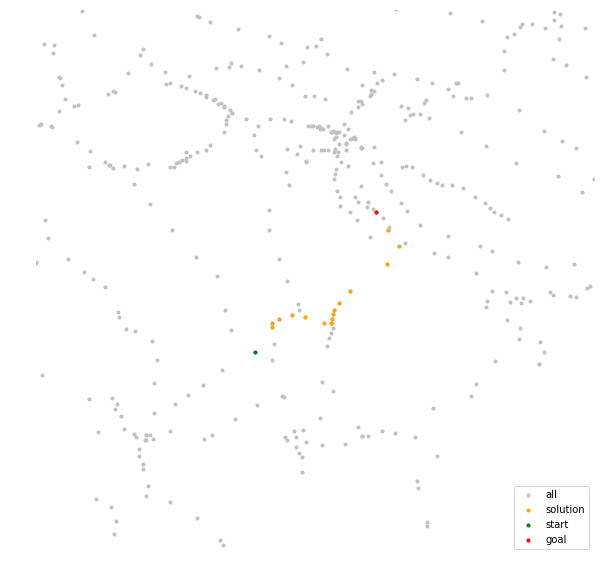

In [9]:
start = 'Rotkreuz'
goal = 'Thalwil'
sbb_map = UndirectedGraph(sbb.createMap())
problem = GraphProblem(start, goal, sbb_map)
node, exp, stored = breadth_first_graph_search(problem)
print_info_about_search(node, exp, stored)
plot_it(node, start, goal)

### Depth First Search

The search algorithm reached Thalwil with a cost of 740.0659999999996.
Nodes to visit: 309
Nodes explored: 937
Nodes stored: 81


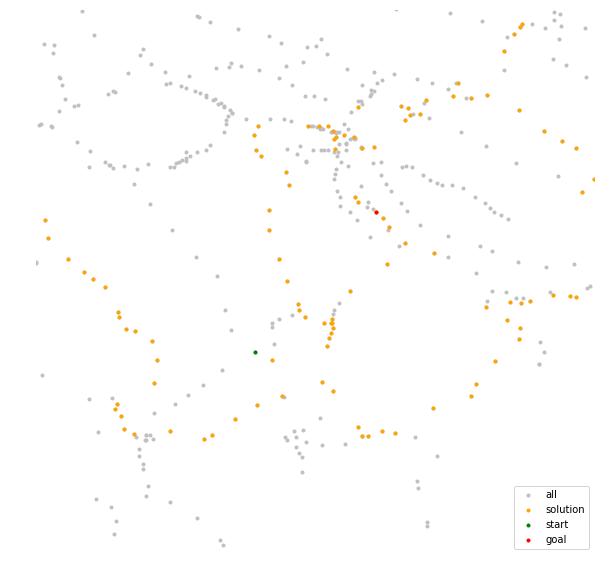

In [10]:
def depth_first_search(problem):
    n = Node(problem.initial)
    
    if problem.goal_test(n.state):
        return n, 0, 0 #found the goal node
    
    frontier = deque([n]) #frontier
    exp = set([n]) #explored
    
    while frontier:
        n = frontier.pop() #get new node
        exp.add(n)
        
        if problem.goal_test(n.state):
            return n, len(exp), len(frontier) #found the goal node
        
        for c in n.expand(problem):
            visited = [n.state for n in frontier] + [n.state for n in exp]
            if c.state not in visited:
                frontier.append(c)
                
    return None, len(exp), len(frontier) #no goal node found

node, exp, stored = depth_first_search(problem)
print_info_about_search(node, exp, stored)
plot_it(node, start, goal)

### Depth Limited Search

The search algorithm reached Thalwil with a cost of 740.0659999999996.
Nodes to visit: 309
Nodes explored: 16
Nodes stored: 0


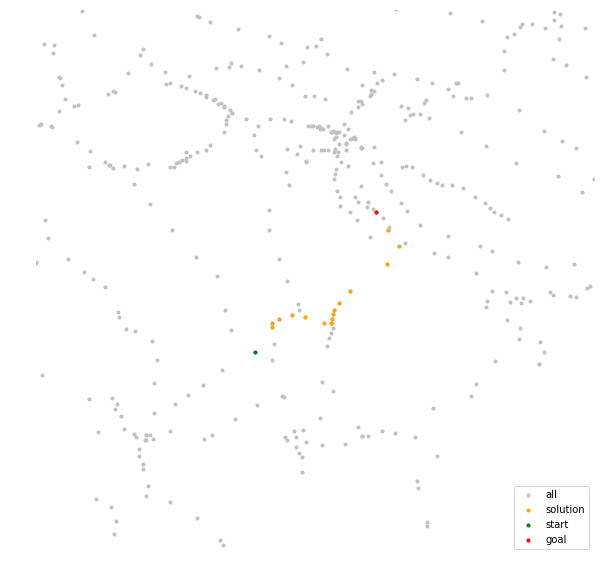

In [11]:
def depth_limited_search(n, prob, l, exp=0):
    if prob.goal_test(n.state):
        return n, exp # found goal node
    
    elif l == 0:
        return True, exp
    
    else:
        cut = False
        for c in n.expand(prob):
            r, exp = depth_limited_search(c, prob, l-1, exp+1)
            
            if isinstance(r, Node):
                return r, exp
            elif r is True:
                c = True
                
        if c is True:
            return True, exp
        else:
            return False, exp
        
n, exp = depth_limited_search(Node(problem.initial), problem, 20, 0)
print_info_about_search(node, exp, 0)
plot_it(n, start, goal)

### Depth First Search

The search algorithm reached Thalwil with a cost of 740.0659999999996.
Nodes to visit: 309
Nodes explored: 3446220
Nodes stored: 0


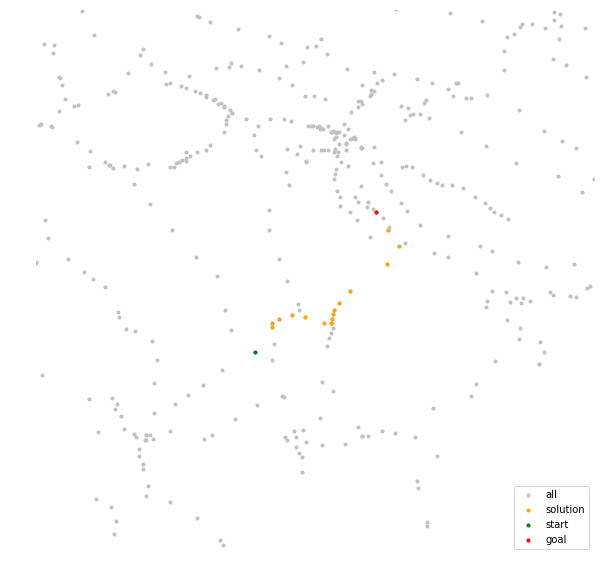

In [12]:
def depth_first_search(prob, exp=0):
    limit = 1
    iteration = 0
    max_iterations = 10000
    while iteration < max_iterations:
        iteration = iteration + 1
        r, exp = depth_limited_search(Node(prob.initial), prob, limit, exp)
        
        if isinstance(r, Node):
            return r, exp
        elif r is False:
            return None, exp
        else: 
            limit = limit + 1
            
n, exp = depth_first_search(problem, 0)
print_info_about_search(node, exp, 0)
plot_it(n, start, goal)

### Uniform Cost Search

In [13]:
def uniform_cost_search(prob):
    n = Node(prob.initial)
    
    frontier = PriorityQueue('min', lambda n: n.path_cost)
    frontier.append(n)
    exp = set([n])
    
    while frontier:
        n = frontier.pop()
        
        if prob.goal_test(n.state):
            return n, len(exp), len(frontier)
        
        exp.add(n)
        
        for c in n.expand(prob):
            if c not in frontier and c.state not in exp:
                frontier.append(c)
            else:
                visited = [n for _, n in frontier.heap if n.state == c.state]
                if visited:
                    del frontier[visited[0]]
                    frontier.append(c)
                    
    return None, len(exp), len(frontier)

n, exp, stored = uniform_cost_search(problem)
print_info_about_search(node, exp, stored)
plot_it(node, start, goal)

TypeError: '<' not supported between instances of 'Node' and 'Node'